In [114]:
#Question 1 
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [115]:
#Define the path
data_path = os.path.join('Instacart Basket Analysis', '02 Data', 'Prepared Data', 'custs_ords_prods_combined.pkl')

In [116]:
#Load the data
df = pd.read_pickle(data_path)

In [117]:
#Display the first few rows of the dataframe
df.head()

order_id user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329       1    prior             1          2                  8   
1   2539329       1    prior             1          2                  8   
2   2539329       1    prior             1          2                  8   
3   2539329       1    prior             1          2                  8   
4   2539329       1    prior             1          2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                     NaN       14084                  2          0   
2                     NaN       12427                  3          0   
3                     NaN       26088                  4          0   
4                     NaN       26405                  5          0   

  first_name surname  gender    state  age date_joined  n_dependants  \
0      Linda  Nguyen  Female  Alabama   31   2/17/2019             3   
1      Linda  Nguyen  Female  Alabama   31   2/17/2019             3   
2      Linda  Nguyen  Female  Alabama   31   2/17/2019             3   
3      Linda  Nguyen  Female  Alabama   31   2/17/2019             3   
4      Linda  Nguyen  Female  Alabama   31   2/17/2019             3   

  marital_status  income _merge  
0        married   40423   both  
1        married   40423   both  
2        married   40423   both  
3        married   40423   both  
4        married   40423   both

In [118]:
#Question 2 Address security concerns
# Display columns to identify potential PII
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'first_name', 'surname', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'marital_status',
       'income', '_merge'],
      dtype='object')

In [119]:
#Question 3

# Define regions based on states
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

#Function to assign regions based on state
def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'


In [120]:
#Apply the function to the dataset
df['region'] = df['state'].apply(assign_region)




In [121]:
#Display the new column to check
df[['state', 'region']].head()

state region
0  Alabama  South
1  Alabama  South
2  Alabama  South
3  Alabama  South
4  Alabama  South

In [122]:
#Question 4

#Create exclusion flag
df['exclusion_flag'] = df['order_number'].apply(lambda x: 'Exclude' if x < 5 else 'Include')

In [123]:
#Display the exclusion flag distribution
df['exclusion_flag'].value_counts()

exclusion_flag
Include    24437060
Exclude     7997429
Name: count, dtype: int64

In [124]:
#Filter high activity customers
df_final_high_activity = df[df['exclusion_flag'] == 'Include']


In [125]:
#Display the shape of the filtered data
print(df_final_high_activity.shape)


(24437060, 22)


In [126]:
df_final_high_activity = df[df['exclusion_flag'] == 'Include']


In [127]:
#Question 5

In [128]:
#Create age groups
df_final_high_activity['age_group'] = pd.cut(df_final_high_activity['age'], bins=[0, 30, 60, 100], labels=['Young Adult', 'Middle-aged Adult', 'Senior'])
print(df_final_high_activity['age_group'].value_counts(dropna=False))

age_group
Middle-aged Adult    11485860
Senior                7975814
Young Adult           4975386
Name: count, dtype: int64


/var/folders/mh/jgcdcff53n3ft01xcw7qxswc0000gn/T/ipykernel_32110/1595162471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_high_activity['age_group'] = pd.cut(df_final_high_activity['age'], bins=[0, 30, 60, 100], labels=['Young Adult', 'Middle-aged Adult', 'Senior'])


In [129]:
#Create income groups
df_final_high_activity['income_group'] = pd.cut(df_final_high_activity['income'], bins=[0, 50000, 150000, float('inf')], labels=['Low Income', 'Mid Income', 'High Income'])
print(df_final_high_activity['income_group'].value_counts(dropna=False))

income_group
Mid Income     18751141
High Income     3089234
Low Income      2596685
Name: count, dtype: int64


/var/folders/mh/jgcdcff53n3ft01xcw7qxswc0000gn/T/ipykernel_32110/266259752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_high_activity['income_group'] = pd.cut(df_final_high_activity['income'], bins=[0, 50000, 150000, float('inf')], labels=['Low Income', 'Mid Income', 'High Income'])


In [130]:
#Create dependents groups
df_final_high_activity['dependents_group'] = pd.cut(df_final_high_activity['n_dependants'], bins=[-1, 0, 1, 2, float('inf')], labels=['No dependents', 'One dependent', 'Two dependents', 'Three or more dependents'])
print(df_final_high_activity['dependents_group'].value_counts(dropna=False))


dependents_group
Three or more dependents    6138896
No dependents               6110838
Two dependents              6099821
One dependent               6087505
Name: count, dtype: int64


/var/folders/mh/jgcdcff53n3ft01xcw7qxswc0000gn/T/ipykernel_32110/3470544223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_high_activity['dependents_group'] = pd.cut(df_final_high_activity['n_dependants'], bins=[-1, 0, 1, 2, float('inf')], labels=['No dependents', 'One dependent', 'Two dependents', 'Three or more dependents'])


In [131]:
#Create the profiling variable
df_final_high_activity['profile'] = df_final_high_activity['age_group'].astype(str) + ' | ' + df_final_high_activity['income_group'].astype(str) + ' | ' + df_final_high_activity['dependents_group'].astype(str)
print(df_final_high_activity[['profile']].head())

/var/folders/mh/jgcdcff53n3ft01xcw7qxswc0000gn/T/ipykernel_32110/887004956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_high_activity['profile'] = df_final_high_activity['age_group'].astype(str) + ' | ' + df_final_high_activity['income_group'].astype(str) + ' | ' + df_final_high_activity['dependents_group'].astype(str)


                                              profile
21  Middle-aged Adult | Low Income | Three or more...
22  Middle-aged Adult | Low Income | Three or more...
23  Middle-aged Adult | Low Income | Three or more...
24  Middle-aged Adult | Low Income | Three or more...
25  Middle-aged Adult | Low Income | Three or more...


In [263]:
#Question 6

In [264]:
#Calculate value counts for age groups
age_group_counts = df_final_high_activity['age_group'].value_counts()

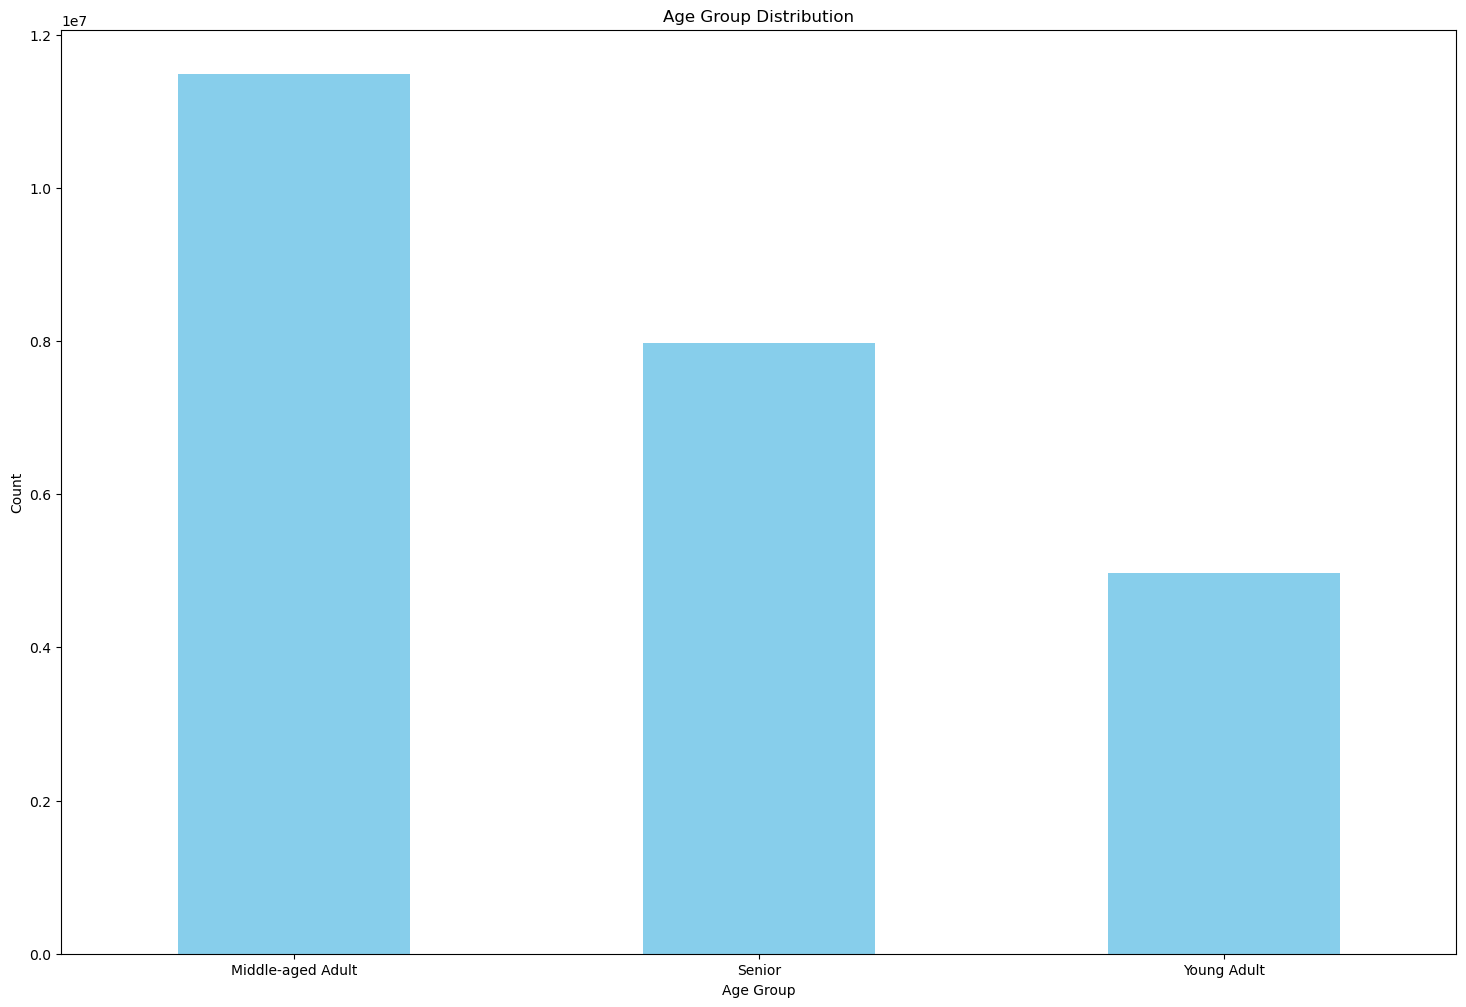

In [265]:
# Define the output directory
output_dir = os.path.join('Instacart Basket Analysis', '04 Analysis', 'Visualizations')

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

#Plot for age group distribution
plt.figure(figsize=(18, 12))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig(os.path.join(output_dir, 'bar_age.png'))
plt.show()

In [266]:
#Calculate value counts for income groups
income_group_counts = df_final_high_activity['income_group'].value_counts()

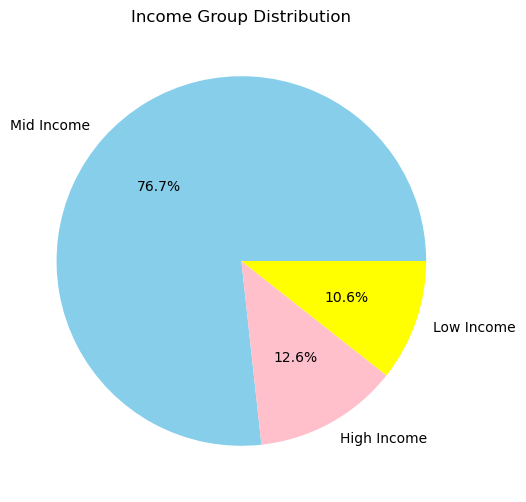

In [267]:
#Create pie chart
#Plot for income group pie chart
plt.figure(figsize=(6, 6))
plt.pie(income_group_counts, labels=income_group_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink', 'yellow'])
plt.title('Income Group Distribution')
plt.savefig(os.path.join(output_dir, 'income_pie.png'), bbox_inches='tight')
plt.show()


In [268]:
#Create the 'hour_group' column based on 'order_hour_of_day'
df_final_high_activity.loc[(df_final_high_activity['order_hour_of_day'] >= 6) & (df_final_high_activity['order_hour_of_day'] <= 12), 'hour_group'] = 'Morning Shopper'
df_final_high_activity.loc[(df_final_high_activity['order_hour_of_day'] > 12) & (df_final_high_activity['order_hour_of_day'] <= 18), 'hour_group'] = 'Afternoon Shopper'
df_final_high_activity.loc[(df_final_high_activity['order_hour_of_day'] > 18) & (df_final_high_activity['order_hour_of_day'] <= 22), 'hour_group'] = 'Night Shopper'
df_final_high_activity.loc[(df_final_high_activity['order_hour_of_day'] < 6) | (df_final_high_activity['order_hour_of_day'] > 22), 'hour_group'] = 'Wee-hours Shopper'

#Ensure the 'hour_group' column is created
print(df_final_high_activity['hour_group'].head())


0    Afternoon Shopper
1    Afternoon Shopper
2    Afternoon Shopper
3    Afternoon Shopper
4    Afternoon Shopper
Name: hour_group, dtype: object


In [269]:
#Calculate value counts for hour groups
hour_counts = df_final_high_activity['hour_group'].value_counts()

In [270]:
#Display the first few rows to verify the DataFrame
print(df_final_high_activity.head())

   order_id user_id eval_set  order_number  order_dow  order_hour_of_day  \
0    431534       1    prior             5          4                 15   
1    431534       1    prior             5          4                 15   
2    431534       1    prior             5          4                 15   
3    431534       1    prior             5          4                 15   
4    431534       1    prior             5          4                 15   

   days_since_prior_order  prices  add_to_cart_order  reordered  ...  \
0                    28.0     196                  1          1  ...   
1                    28.0   12427                  2          1  ...   
2                    28.0   10258                  3          1  ...   
3                    28.0   25133                  4          1  ...   
4                    28.0   10326                  5          0  ...   

  exclusion_flag          age_group income_group          dependents_group  \
0        Include  Middle-aged Ad

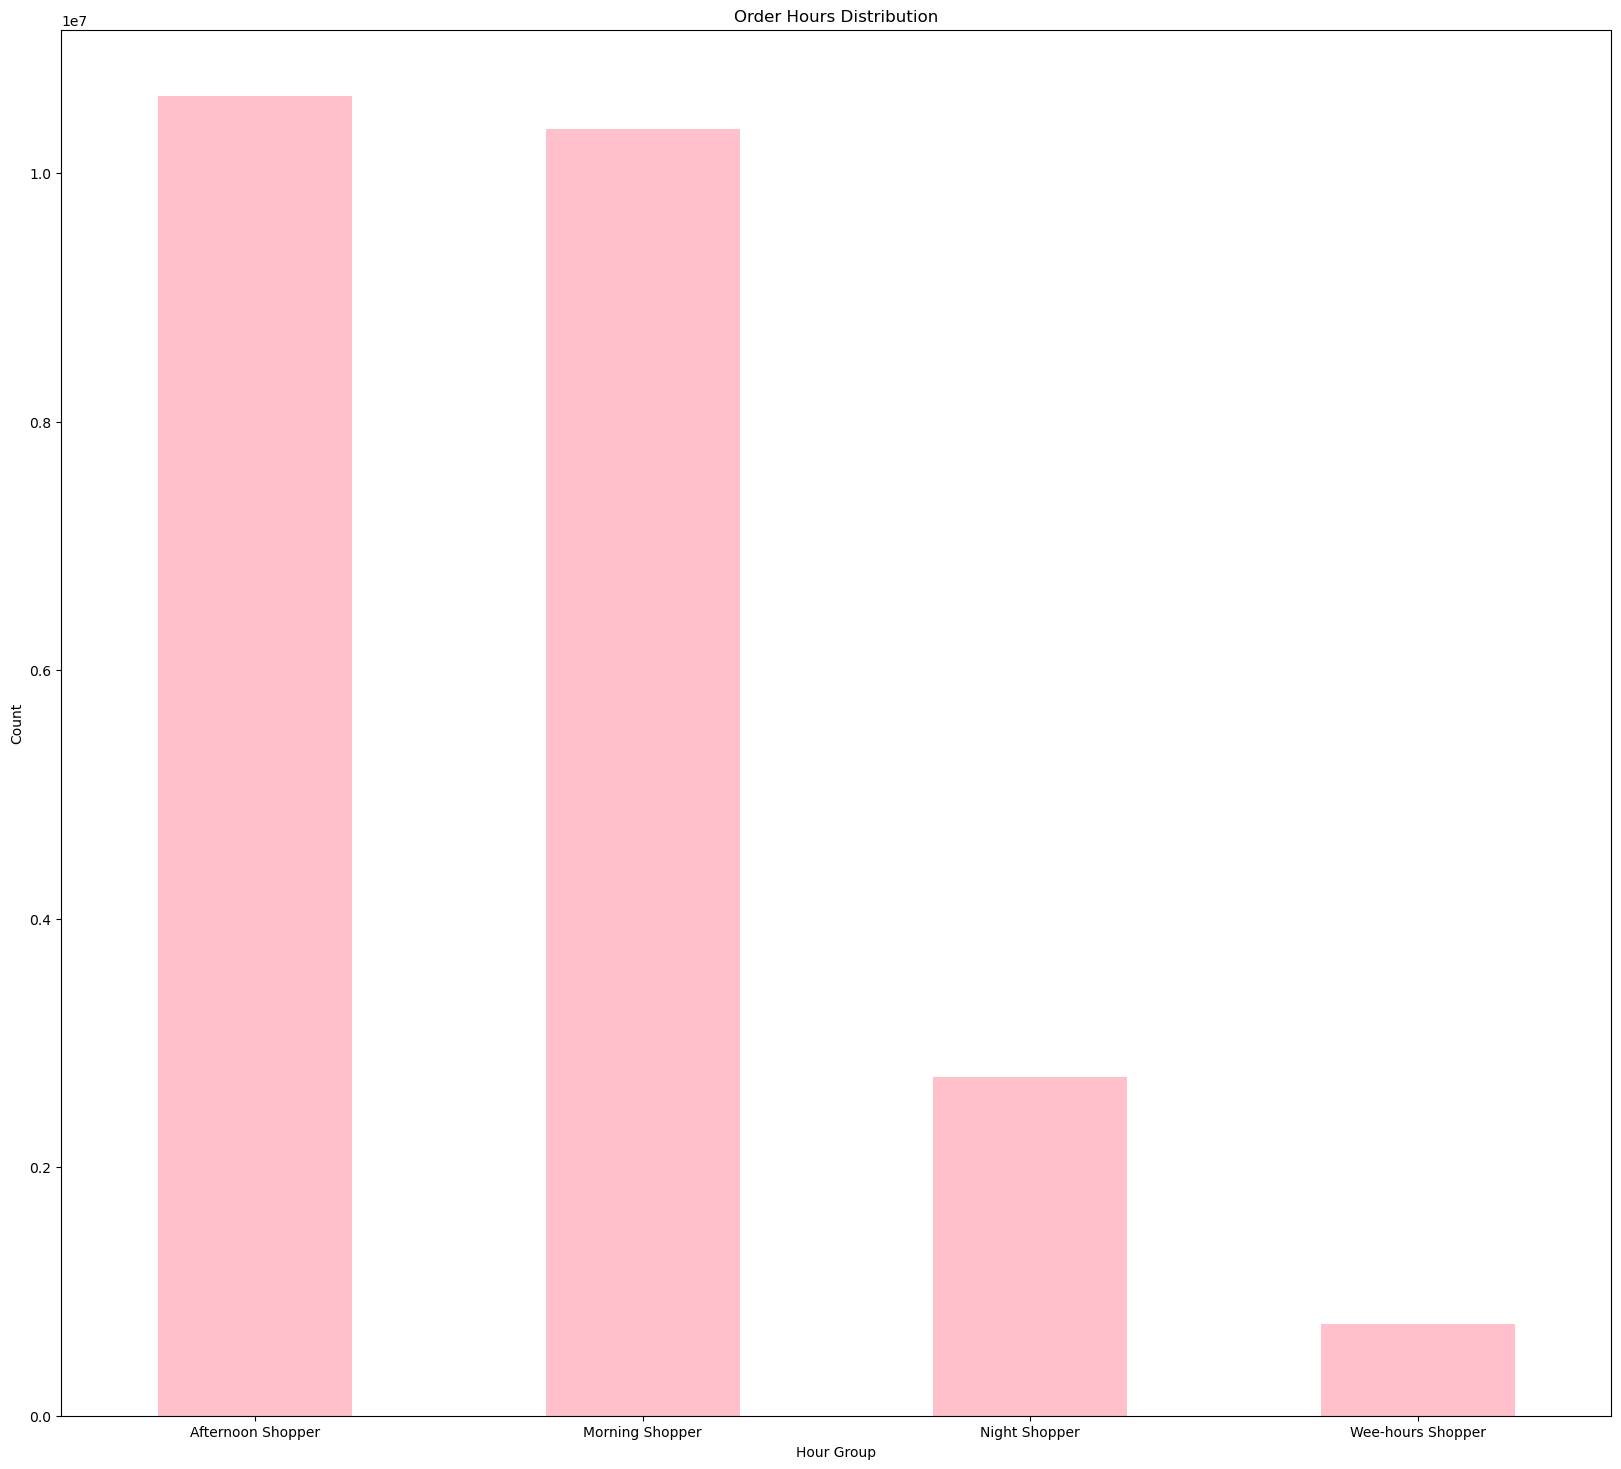

In [271]:
#Plot for order hour distribution
plt.figure(figsize=(20, 18))
hour_counts.plot(kind='bar', color='pink')
plt.title('Order Hours Distribution')
plt.xlabel('Hour Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig(os.path.join(output_dir, 'bar_hour_count.png'))
plt.show()


In [272]:
# Display the first few rows to verify the DataFrame
print(df_final_high_activity.head())



   order_id user_id eval_set  order_number  order_dow  order_hour_of_day  \
0    431534       1    prior             5          4                 15   
1    431534       1    prior             5          4                 15   
2    431534       1    prior             5          4                 15   
3    431534       1    prior             5          4                 15   
4    431534       1    prior             5          4                 15   

   days_since_prior_order  prices  add_to_cart_order  reordered  ...  \
0                    28.0     196                  1          1  ...   
1                    28.0   12427                  2          1  ...   
2                    28.0   10258                  3          1  ...   
3                    28.0   25133                  4          1  ...   
4                    28.0   10326                  5          0  ...   

  exclusion_flag          age_group income_group          dependents_group  \
0        Include  Middle-aged Ad

In [273]:
#Checking columns in the DataFrame
print(df_final_high_activity.columns)

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'prices',
       'add_to_cart_order', 'reordered', 'first_name', 'surname', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'marital_status',
       'income', '_merge', 'region', 'exclusion_flag', 'age_group',
       'income_group', 'dependents_group', 'profile', 'department_id_x',
       'department_id_y', 'department_id', 'hour_group', 'loyalty_flag'],
      dtype='object')


In [274]:
#Checking a few rows to understand the data structure
print(df_final_high_activity.head())


   order_id user_id eval_set  order_number  order_dow  order_hour_of_day  \
0    431534       1    prior             5          4                 15   
1    431534       1    prior             5          4                 15   
2    431534       1    prior             5          4                 15   
3    431534       1    prior             5          4                 15   
4    431534       1    prior             5          4                 15   

   days_since_prior_order  prices  add_to_cart_order  reordered  ...  \
0                    28.0     196                  1          1  ...   
1                    28.0   12427                  2          1  ...   
2                    28.0   10258                  3          1  ...   
3                    28.0   25133                  4          1  ...   
4                    28.0   10326                  5          0  ...   

  exclusion_flag          age_group income_group          dependents_group  \
0        Include  Middle-aged Ad

In [275]:
#Creating the loyalty_flag column based on the number of orders
df_final_high_activity['loyalty_flag'] = df_final_high_activity['order_number'].apply(lambda x: 'Loyal' if x > 10 else 'New')


In [262]:
#Renaming the product_id column to prices
df_final_high_activity.rename(columns={'product_id': 'prices'}, inplace=True)

In [251]:
#Checking the columns of the DataFrame again to ensure changes are applied
print(df_final_high_activity.columns)


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'prices',
       'add_to_cart_order', 'reordered', 'first_name', 'surname', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'marital_status',
       'income', '_merge', 'region', 'exclusion_flag', 'age_group',
       'income_group', 'dependents_group', 'profile', 'department_id_x',
       'department_id_y', 'department_id', 'hour_group', 'loyalty_flag'],
      dtype='object')


In [252]:
# Creating the subset with the correct columns
df_final_subset = df_final_high_activity[['user_id', 'age_group', 'income_group', 'hour_group', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order', 'prices']]


In [253]:
#Displaying the first few rows of the subset to verify
print(df_final_subset.head())

  user_id          age_group income_group         hour_group loyalty_flag  \
0       1  Middle-aged Adult   Low Income  Afternoon Shopper          New   
1       1  Middle-aged Adult   Low Income  Afternoon Shopper          New   
2       1  Middle-aged Adult   Low Income  Afternoon Shopper          New   
3       1  Middle-aged Adult   Low Income  Afternoon Shopper          New   
4       1  Middle-aged Adult   Low Income  Afternoon Shopper          New   

  region  order_number  days_since_prior_order  prices  
0  South             5                    28.0     196  
1  South             5                    28.0   12427  
2  South             5                    28.0   10258  
3  South             5                    28.0   25133  
4  South             5                    28.0   10326  


In [ ]:
#Question 7

In [ ]:
# Aggregating the max, mean, and min variables on a customer-profile level
aggregations = df_final_subset.groupby(['age_group', 'income_group', 'loyalty_flag']).agg({
    'days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']
})

In [ ]:
#Crosstab for age group and region
age_region = pd.crosstab(df_final_subset['region'], df_final_subset['age_group'], dropna=False)
print(age_region)

In [162]:
#Question 8

In [175]:
#Define the path to the departments data
path = 'Instacart Basket Analysis/02 Data/Prepared Data/departments_wrangled.csv'

#Load the departments data
df_departments = pd.read_csv(path, index_col=False)

#Display the first few rows and columns of the departments DataFrame to confirm it loaded correctly
print("df_departments.head():")
print(df_departments.head())
print("df_departments.columns:")
print(df_departments.columns)


df_departments.head():
   Unnamed: 0 department
0           1     frozen
1           2      other
2           3     bakery
3           4    produce
4           5    alcohol
df_departments.columns:
Index(['Unnamed: 0', 'department'], dtype='object')


In [176]:
#Check if the columns are correctly named and rename if necessary
if 'Unnamed: 0' in df_departments.columns:
    df_departments.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

#Verify the rename operation
print("df_departments.columns after rename (if needed):")
print(df_departments.columns)

df_departments.columns after rename (if needed):
Index(['department_id', 'department'], dtype='object')


In [177]:
#Display the first few rows and columns of df_final_high_activity to confirm its structure
print(df_final_high_activity.head())
print(df_final_high_activity.columns)


   order_id user_id eval_set  order_number  order_dow  order_hour_of_day  \
0    431534       1    prior             5          4                 15   
1    431534       1    prior             5          4                 15   
2    431534       1    prior             5          4                 15   
3    431534       1    prior             5          4                 15   
4    431534       1    prior             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                    28.0         196                  1          1  ...   
1                    28.0       12427                  2          1  ...   
2                    28.0       10258                  3          1  ...   
3                    28.0       25133                  4          1  ...   
4                    28.0       10326                  5          0  ...   

  income _merge region exclusion_flag          age_group income_group  \
0  40423   bo

In [178]:
# Displaying a sample of df_final_high_activity
print(df_final_high_activity.sample(5))


          order_id user_id eval_set  order_number  order_dow  \
6532920    1065381   54874    prior            28          0   
23539106   2447840  198438    prior            21          0   
18899239    694051  159183    prior            54          4   
8432482    1079382   70860    prior            68          3   
258742     1020926    2316    prior             8          6   

          order_hour_of_day  days_since_prior_order  product_id  \
6532920                  21                    10.0        8277   
23539106                  7                     6.0       24852   
18899239                 11                     5.0       22395   
8432482                  11                     3.0       48745   
258742                   10                    18.0       23579   

          add_to_cart_order  reordered  ...  income _merge region  \
6532920                   8          1  ...   96952   both  South   
23539106                  1          1  ...  141754   both   West   
18899

In [179]:
#Displaying a sample of df_final_high_activity
print(df_final_high_activity.sample(5))


          order_id user_id eval_set  order_number  order_dow  \
22505768   2863816  189777    prior            93          4   
5836222    3169126   49159    prior            10          0   
13887580    938813  116551    prior            16          5   
642794     2135089    5507    prior             5          1   
3028686    2001059   25468    prior            11          0   

          order_hour_of_day  days_since_prior_order  product_id  \
22505768                 17                     3.0       13176   
5836222                  13                     2.0       22170   
13887580                 11                    12.0       12023   
642794                   14                    30.0        5450   
3028686                  14                    30.0       41544   

          add_to_cart_order  reordered  ...  income _merge     region  \
22505768                  3          1  ...   39869   both       West   
5836222                   3          1  ...   62688   both  Northe

In [180]:
#Confirming department_id in df_final_high_activity and df_departments
print('df_final_high_activity columns:')
print(df_final_high_activity.columns)

print('df_departments columns:')
print(df_departments.columns)


df_final_high_activity columns:
Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'first_name', 'surname', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'marital_status',
       'income', '_merge', 'region', 'exclusion_flag', 'age_group',
       'income_group', 'dependents_group', 'profile', 'department_id_x',
       'department_id_y'],
      dtype='object')
df_departments columns:
Index(['department_id', 'department'], dtype='object')


In [181]:
#Assuming you have a products DataFrame
# products.csv should have columns: product_id, department_id
products_path = 'Instacart Basket Analysis/02 Data/Original Data/products.csv'
df_products = pd.read_csv(products_path)

#Merging df_products with df_final_high_activity to get department_id
df_final_high_activity = df_final_high_activity.merge(df_products[['product_id', 'department_id']], on='product_id', how='left')

#Now try merging df_final_high_activity with df_departments again
df_final_merged = df_final_high_activity.merge(df_departments, on='department_id', how='left')
print(df_final_merged.head())


   order_id user_id eval_set  order_number  order_dow  order_hour_of_day  \
0    431534       1    prior             5          4                 15   
1    431534       1    prior             5          4                 15   
2    431534       1    prior             5          4                 15   
3    431534       1    prior             5          4                 15   
4    431534       1    prior             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                    28.0         196                  1          1  ...   
1                    28.0       12427                  2          1  ...   
2                    28.0       10258                  3          1  ...   
3                    28.0       25133                  4          1  ...   
4                    28.0       10326                  5          0  ...   

  region exclusion_flag          age_group income_group  \
0  South        Include  Mi

In [204]:
#Question 9

#Compare customer profiles with regions and departments
#Creating crosstab for region and department
region_department = pd.crosstab(df_final_merged['region'], df_final_merged['department'], dropna=False)
print(region_department)


department  alcohol  babies  bakery  beverages  breakfast  bulk  canned goods  \
region                                                                          
Midwest       25616   78502  206050     472254     124004  6488        184194   
Northeast     18604   59555  158323     367868      94455  4598        137950   
South         36309  113970  293920     680605     177887  9184        263145   
West          27653   83938  228405     515757     138669  7288        202501   

department  dairy eggs    deli  dry goods pasta  ...  international  \
region                                           ...                  
Midwest         965235  182735           148529  ...          46607   
Northeast       732040  139553           110708  ...          34491   
South          1375798  259644           210680  ...          65417   
West           1060181  201079           163808  ...          51385   

department  meat seafood  missing  other  pantry  personal care   pets  \
region      

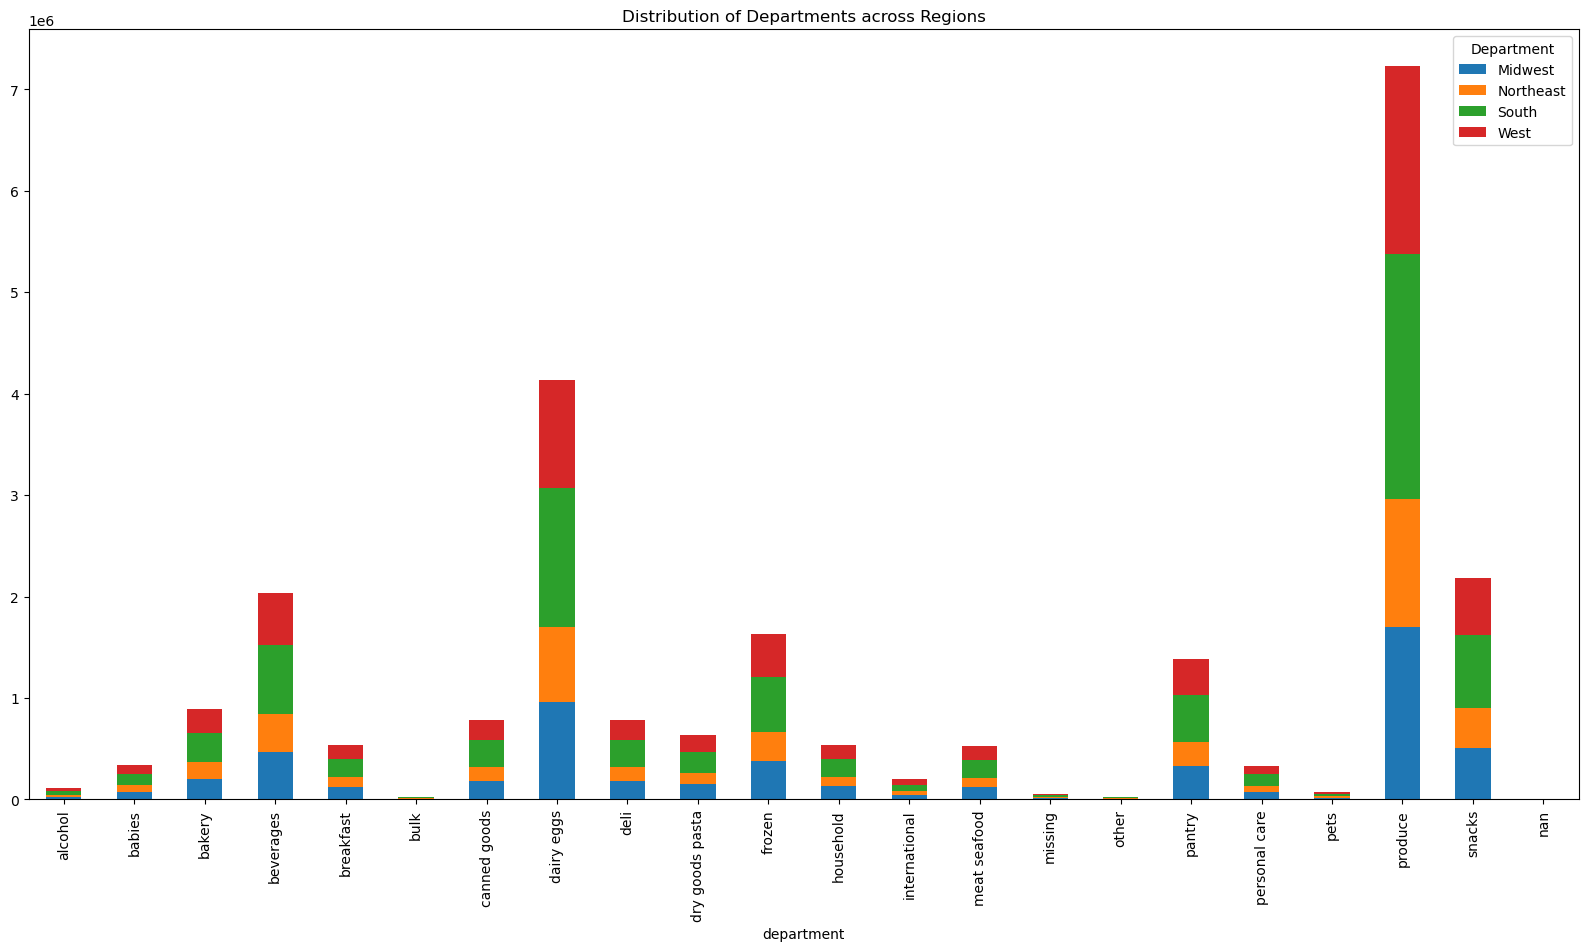

In [218]:
#Ensure the directory exists
output_dir = os.path.join('Instacart Basket Analysis', 'Analysis', 'Visualizations')
os.makedirs(output_dir, exist_ok=True)

#For region_department
region_department.T.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Distribution of Departments across Regions')
plt.legend(title='Department')
plt.savefig(os.path.join(output_dir, 'region_department_bar.png'))
plt.show()


In [206]:
#Creating crosstab for region and profile
region_profile = pd.crosstab(df_final_merged['region'], df_final_merged['profile'], dropna=False)
print(region_profile)

profile    Middle-aged Adult | High Income | No dependents  \
region                                                       
Midwest                                              92337   
Northeast                                            62948   
South                                               130629   
West                                                106920   

profile    Middle-aged Adult | High Income | One dependent  \
region                                                       
Midwest                                              93558   
Northeast                                            67650   
South                                               118770   
West                                                107247   

profile    Middle-aged Adult | High Income | Three or more dependents  \
region                                                                  
Midwest                                                83901            
Northeast                          

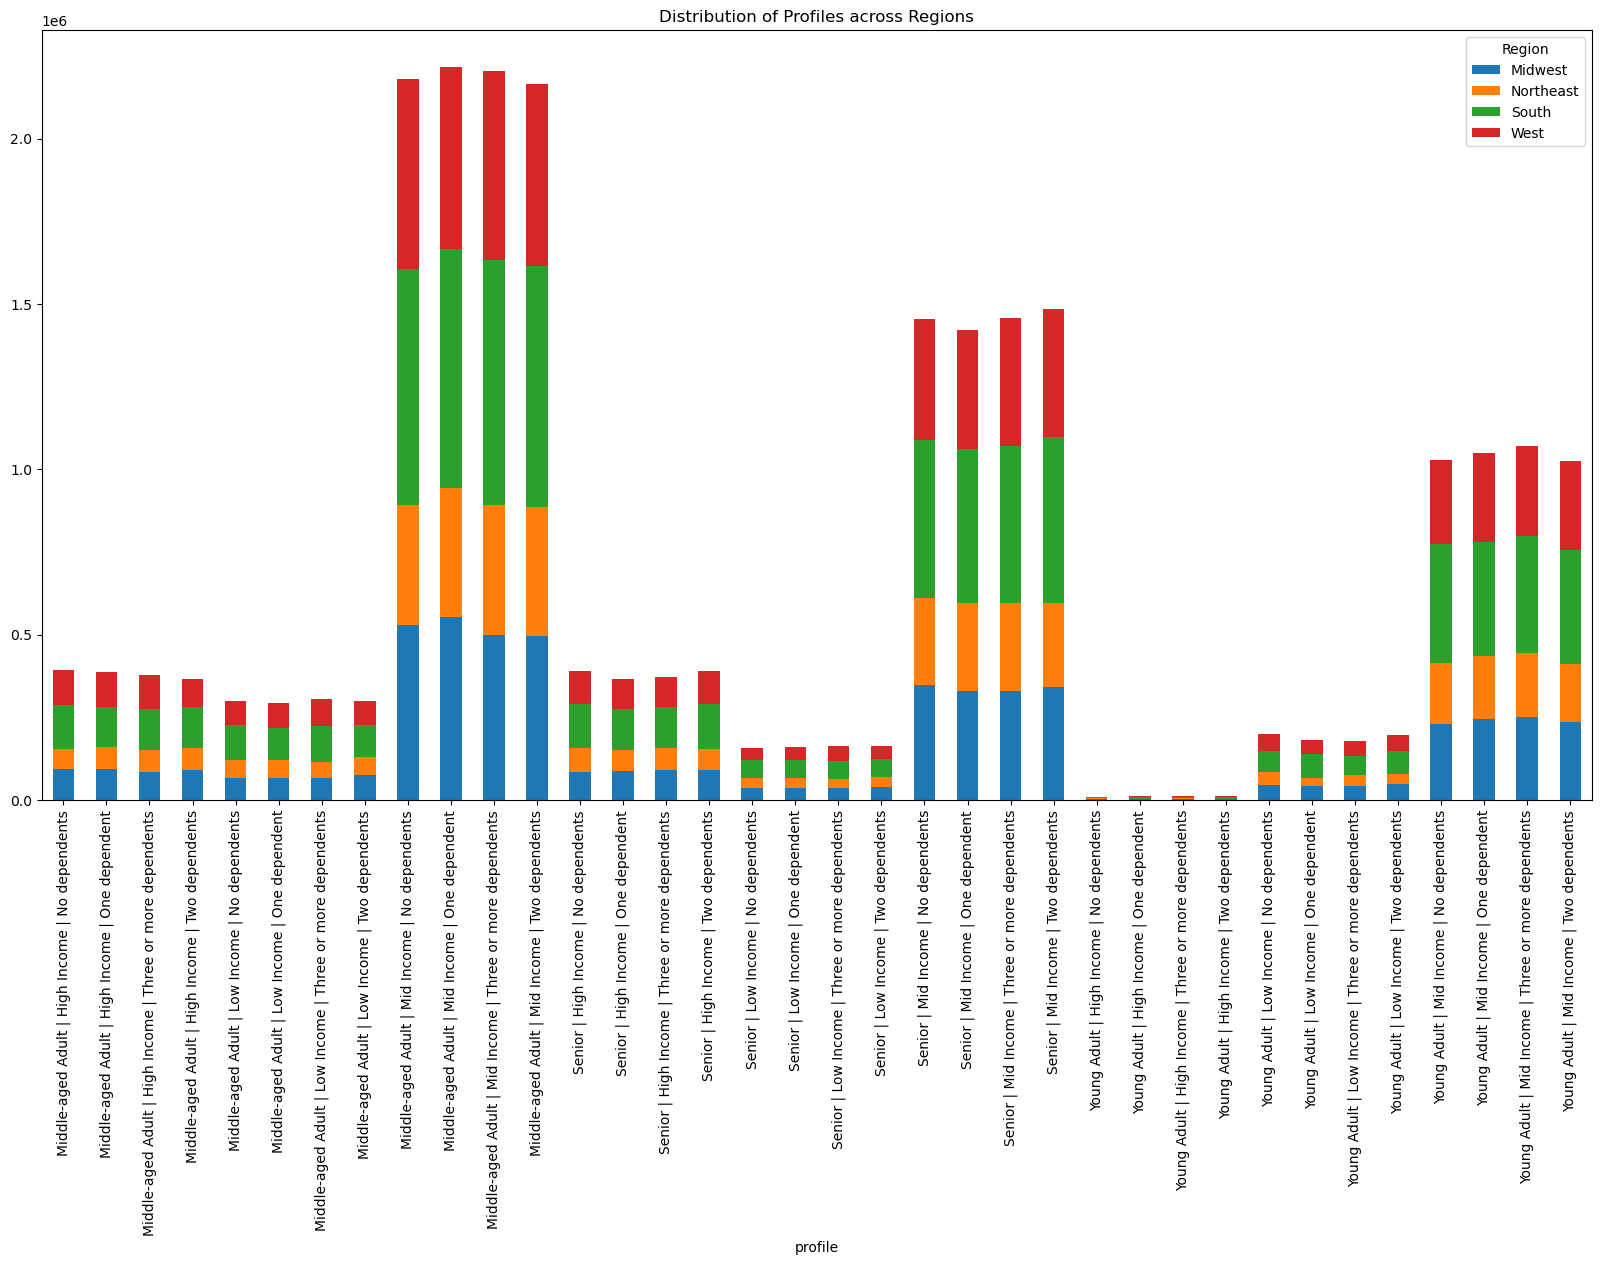

In [219]:
correct_path = 'Instacart Basket Analysis/02 Data/Prepared Data'
output_dir = os.path.join(correct_path, 'Analysis', 'Visualizations')
os.makedirs(output_dir, exist_ok=True)

#For region_profile
region_profile.T.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Distribution of Profiles across Regions')
plt.legend(title='Region')
plt.savefig(os.path.join(output_dir, 'region_profile_bar.png'))
plt.show()

In [212]:
#Creating crosstab for department and profile
department_profile = pd.crosstab(df_final_merged['department'], df_final_merged['profile'], dropna=False)
print(department_profile)


profile          Middle-aged Adult | High Income | No dependents  \
department                                                         
alcohol                                                     2604   
babies                                                      6283   
bakery                                                     14949   
beverages                                                  30815   
breakfast                                                   8323   
bulk                                                         439   
canned goods                                               13378   
dairy eggs                                                 67647   
deli                                                       12501   
dry goods pasta                                            10308   
frozen                                                     26416   
household                                                   9007   
international                                   

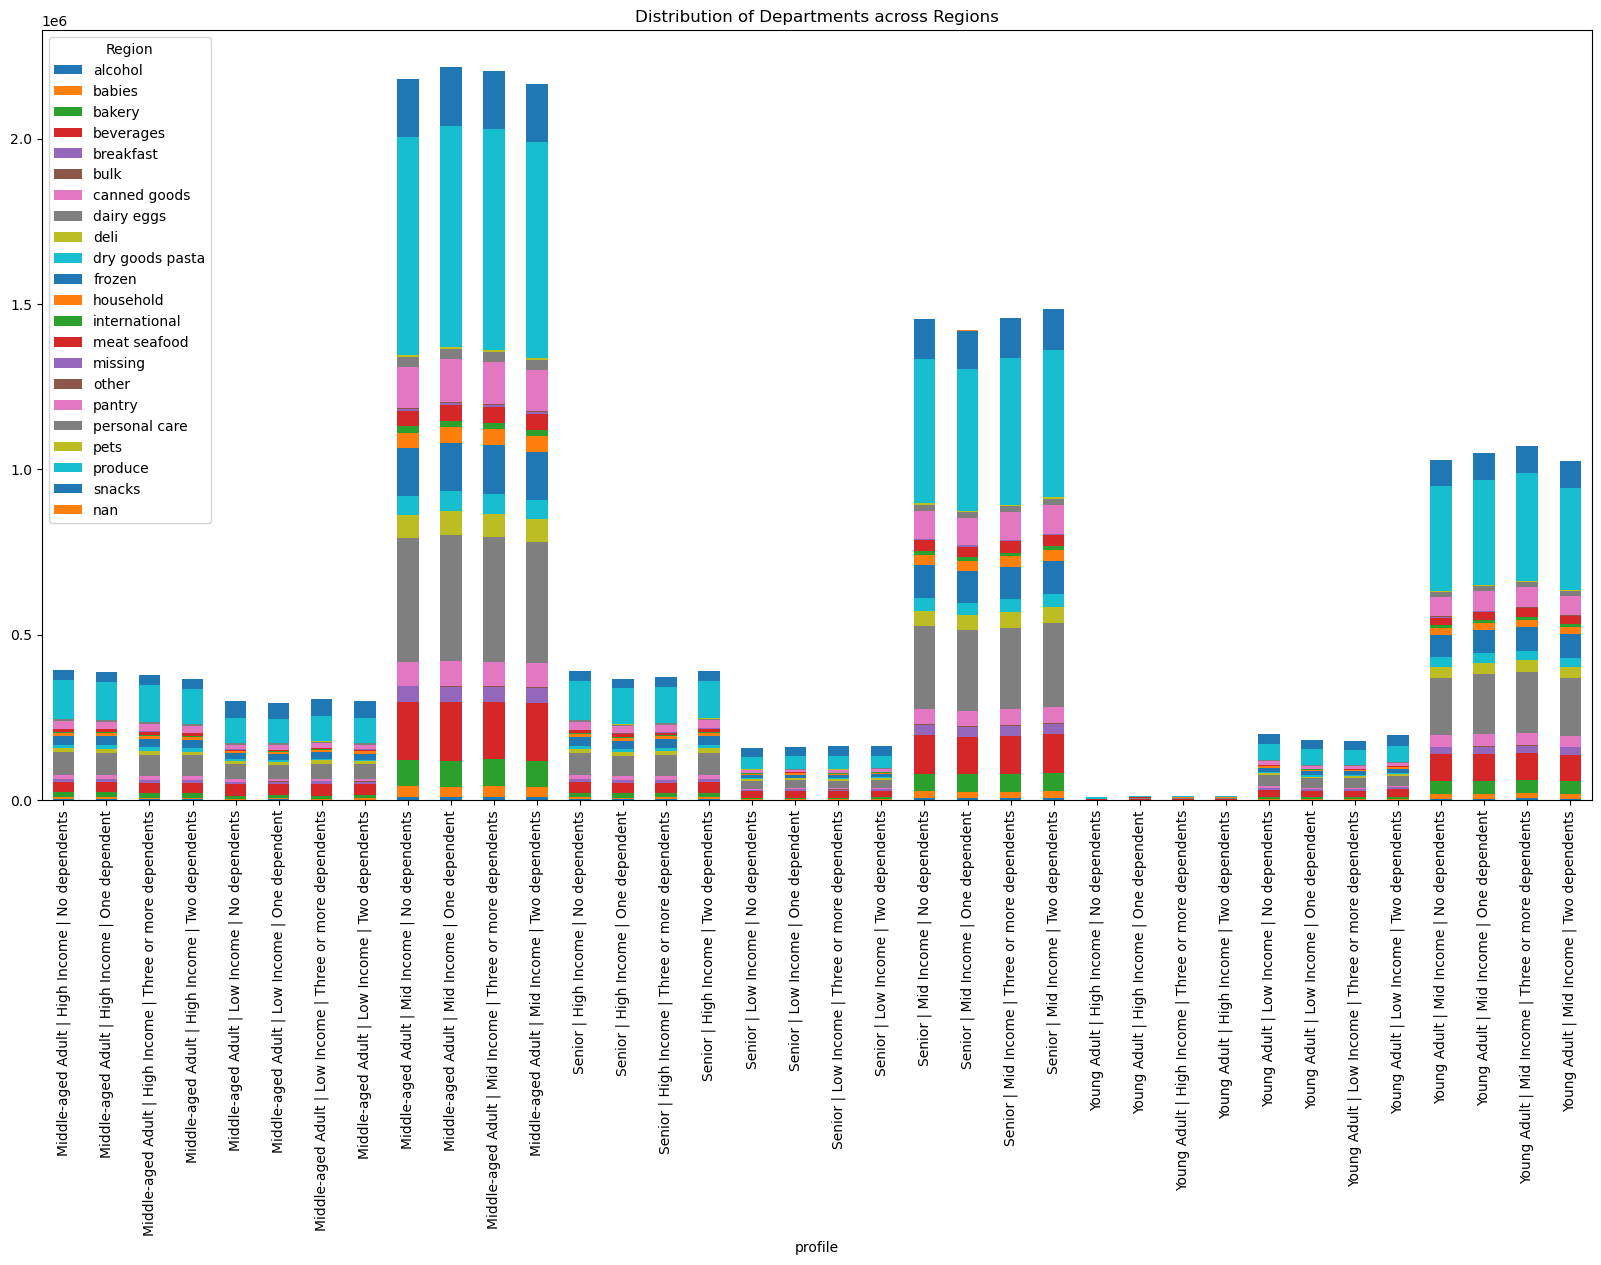

In [220]:
#Ensure the directory exists
output_dir = os.path.join('Instacart Basket Analysis', 'Analysis', 'Visualizations')
os.makedirs(output_dir, exist_ok=True)

#For department_profile
department_profile.T.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Distribution of Departments across Regions')
plt.legend(title='Region')
plt.savefig(os.path.join(output_dir, 'department_profile_bar.png'))
plt.show()

In [ ]:
#Saving and exporting

In [283]:
#Define paths
base_path = 'Instacart Basket Analysis/04 Analysis/Visualizations'

#Ensure the directory exists
os.makedirs(base_path, exist_ok=True)

#Assuming the figures are already created, save them to the correct path


In [284]:
#Save the region_department bar plot
plt.figure(figsize=(20, 10))
region_department.T.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Distribution of Departments across Regions')
plt.legend(title='Department')
plt.savefig(os.path.join(base_path, 'region_department_bar.png'))
plt.close() 

<Figure size 2000x1000 with 0 Axes>

In [285]:
#Save the region_profile bar plot
plt.figure(figsize=(20, 10))
region_profile.T.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Distribution of Profiles across Regions')
plt.legend(title='Region')
plt.savefig(os.path.join(base_path, 'region_profile_bar.png'))
plt.close() 

<Figure size 2000x1000 with 0 Axes>

In [286]:
#Save the department_profile bar plot
plt.figure(figsize=(20, 10))
department_profile.T.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Distribution of Departments across Profiles')
plt.legend(title='Region')
plt.savefig(os.path.join(base_path, 'department_profile_bar.png'))
plt.close()  

<Figure size 2000x1000 with 0 Axes>

In [282]:
#Question 10
#Export the final dataset
final_data_path = os.path.join(base_path, 'final_dataset.csv')
df_final_merged.to_csv(final_data_path, index=False)
print(f"Final dataset saved to {final_data_path}")


Final dataset saved to Instacart Basket Analysis/04 Analysis/Visualizations/final_dataset.csv
